<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/CNN/Plant_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **@Author: Kushal H**

In [ ]:
from google.colab import files

files.upload()

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emmarex/plantdisease

 99% 648M/658M [00:04<00:00, 165MB/s]
100% 658M/658M [00:04<00:00, 157MB/s]


In [4]:
!unzip /content/plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

Import neccessary packages

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded required libraries...")

Loaded required libraries...


In [6]:
fpath = "/content/PlantVillage/"
random_seed = 111

categories = os.listdir(fpath)
print(" No. of categories = ", len(categories))
print("List of categories = ")
categories




 No. of categories =  15
List of categories = 


['Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Pepper__bell___Bacterial_spot',
 'Tomato__Target_Spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_healthy',
 'Tomato_Early_blight',
 'Potato___Late_blight',
 'Tomato_Septoria_leaf_spot',
 'Potato___healthy',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [7]:
categories2={v : k for v, k in enumerate(categories)}
categories2

{0: 'Tomato_Bacterial_spot',
 1: 'Tomato_Late_blight',
 2: 'Tomato_Leaf_Mold',
 3: 'Pepper__bell___healthy',
 4: 'Pepper__bell___Bacterial_spot',
 5: 'Tomato__Target_Spot',
 6: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 7: 'Tomato_healthy',
 8: 'Tomato_Early_blight',
 9: 'Potato___Late_blight',
 10: 'Tomato_Septoria_leaf_spot',
 11: 'Potato___healthy',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Potato___Early_blight',
 14: 'Tomato__Tomato_mosaic_virus'}

Generating pickle file


In [8]:
import joblib

joblib.dump(categories2, 'categories.pickle')

['categories.pickle']

Navigating to the dataset directory

In [9]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
               # print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))
                
                labels.append(index)
    return img_lst, labels


In [10]:

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  4352 
No. of labels loaded =  4352
<class 'list'> <class 'list'>


Converting to Numpy array

In [11]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Generating Random image

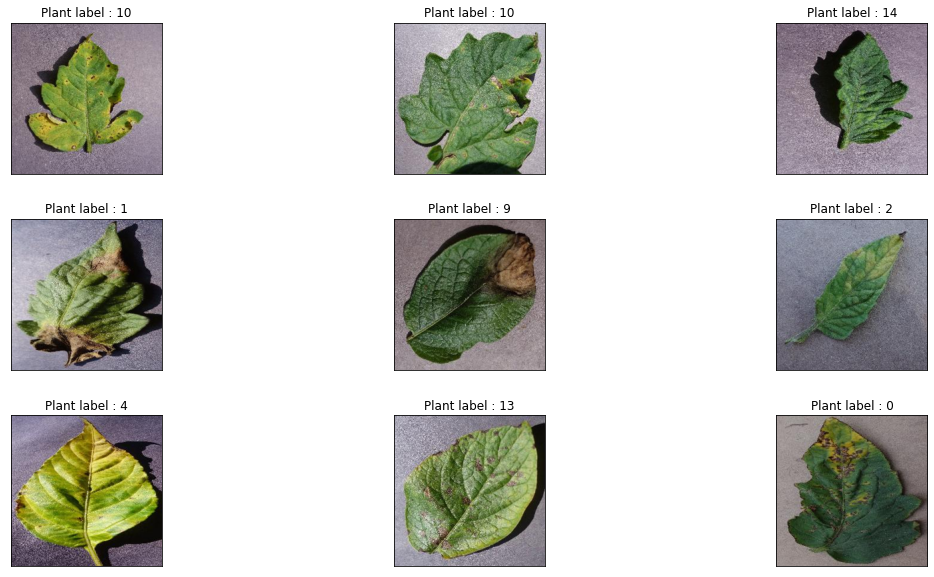

In [12]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [13]:
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 4349 4350 4351]

'n' values after shuffling =  [3063 2450 3854 ... 4182 2004 3924]


In [14]:
#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (4352, 227, 227, 3) 
Labels shape after shuffling =  (4352,)


In [15]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (4352, 227, 227, 3)


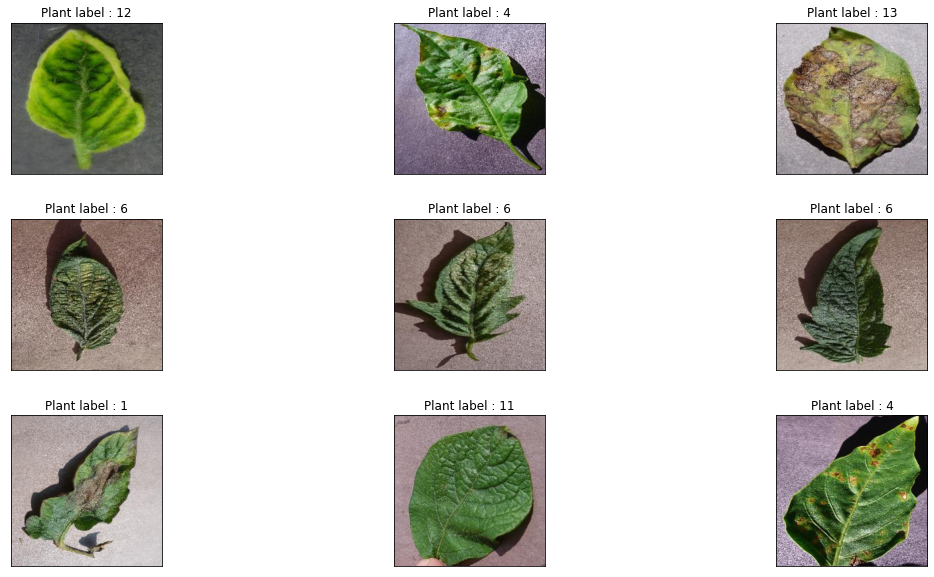

In [16]:
display_rand_images(images, labels)

Splitting the data into training set and testing set

In [17]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

In [18]:
len(y_test)

871

In [19]:

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


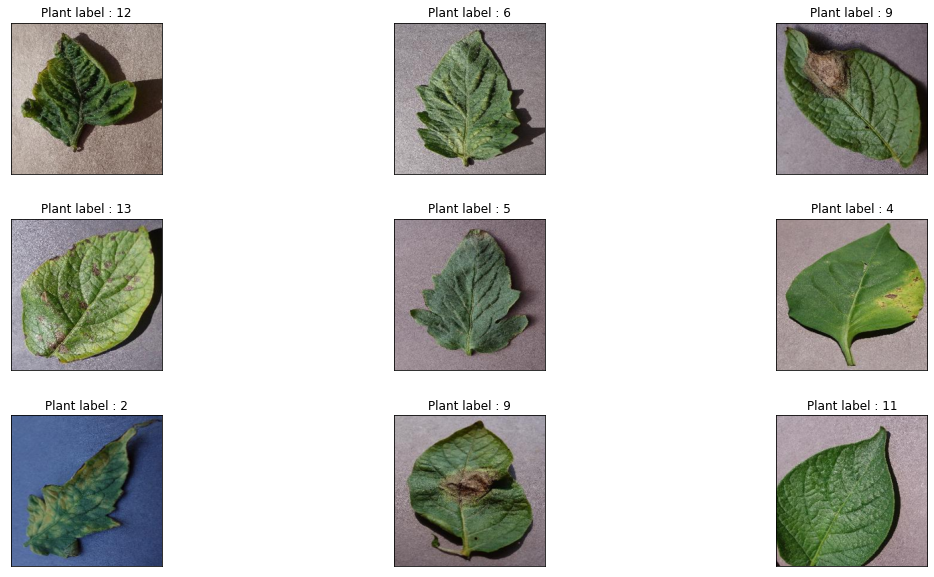

In [20]:
display_rand_images(x_train, y_train)

Building the CNN model (AlexNet)

In [21]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(15,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

Compile the defined CNN model

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Creating checkpoint to save the model

In [27]:
from tensorflow.keras.callbacks import *
checkpoint = ModelCheckpoint("fruits.h5",
                             monitor="loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)

creating early stop to stop the training when deserved output is achieved

In [28]:

earlystop = EarlyStopping(monitor = 'loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [29]:

reduce_lr = ReduceLROnPlateau(monitor = 'loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

In [30]:

def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [31]:

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [32]:
callbacks = [earlystop, reduce_lr,lr_schedule]

Fitting the model 

In [33]:
history = model.fit(x_train, y_train, epochs=65, callbacks=callbacks)

Epoch 1/65

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 287s 3s/step - loss: 3.0032 - accuracy: 0.2084
Epoch 2/65

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 282s 3s/step - loss: 1.8600 - accuracy: 0.4319
Epoch 3/65

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 282s 3s/step - loss: 1.3814 - accuracy: 0.5673
Epoch 4/65

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 284s 3s/step - loss: 1.2684 - accuracy: 0.5894
Epoch 5/65

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 283s 3s/step - loss: 1.0655 - accuracy: 0.6634
Epoch 6/65

Epoch 00006: LearningRateScheduler reducing learning rate 

Model Accuracy

In [34]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
28/28 [==============================] - 20s 693ms/step - loss: 0.3327 - accuracy: 0.9116
Test Accuracy: 91.159588098526


In [ ]:
model.save('model2.h5')

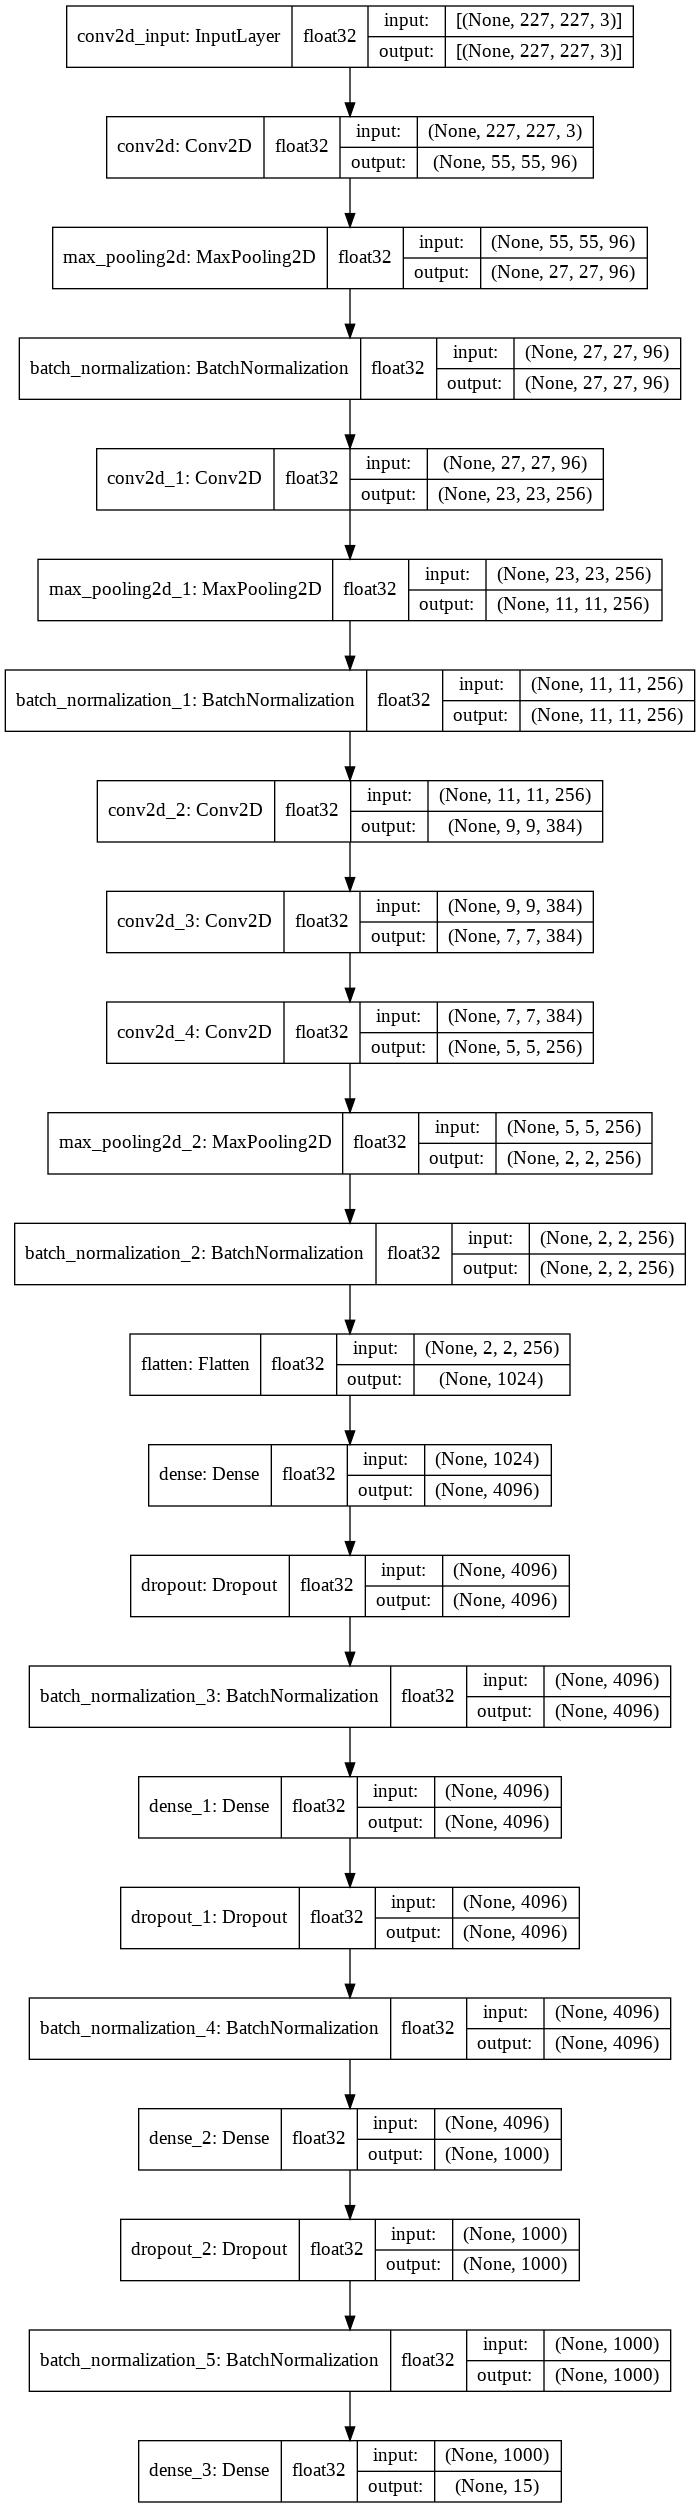

In [38]:

tf.keras.utils.plot_model(model, to_file = 'plant.png',  show_shapes = True, show_dtype = True, 
                          show_layer_names = True, rankdir='TB', expand_nested = True)

Making prediction

In [39]:
pred = model.predict(x_test)

In [40]:
pred.shape

(871, 15)

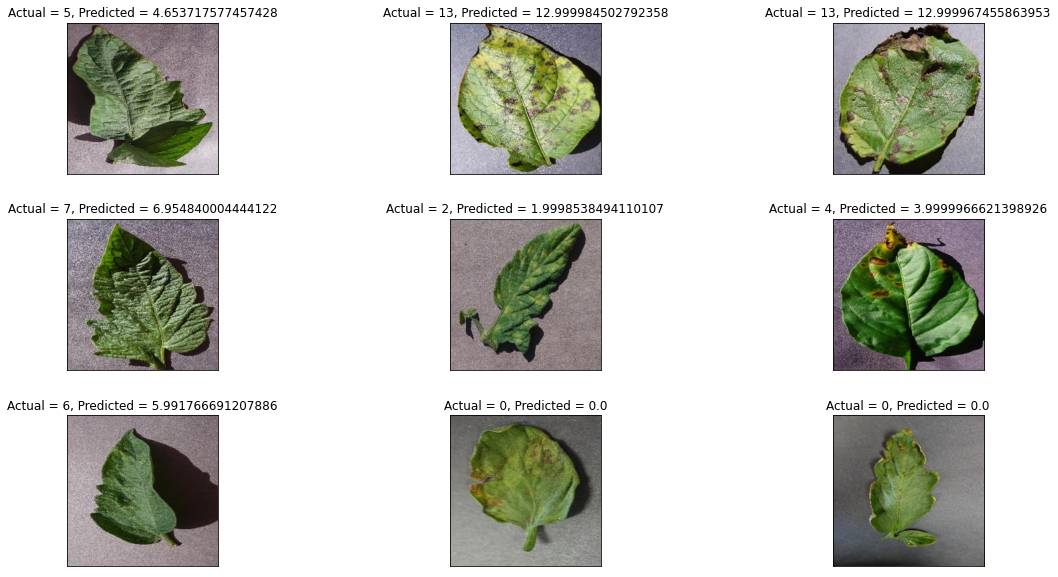

In [41]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [42]:
predicted_class_indices=np.argmax(pred,axis=1)

In [43]:
predicted_class_indices

array([ 7,  8,  5,  6,  2,  6,  9,  8, 12,  1, 14, 12,  3,  3,  7,  8, 10,
       12,  6,  1,  2,  7, 11, 12, 14,  8, 10,  8,  8, 13,  7,  2, 12,  7,
       10,  1,  0,  2, 11, 12,  2,  1,  0,  5,  1,  8,  7,  0,  3,  5, 14,
        2,  8, 10,  2,  1,  0,  7,  9, 13,  6,  1,  8,  3,  8,  2,  5,  2,
       12,  5,  4, 12, 14,  6,  3, 13,  6,  1, 13,  9,  0,  8,  9,  0,  6,
        5, 12,  4, 10,  8,  7, 12,  6,  4,  0,  1,  8,  3, 14,  9,  9,  6,
        0, 14,  5, 14, 10, 10,  5,  1, 10,  8, 11,  6, 10,  4,  9,  3, 12,
       10,  1,  7, 12,  0, 14, 13, 10,  4,  8,  6,  4,  3, 13,  1,  0, 11,
        4,  1,  6, 10, 13,  2,  3,  3,  3,  3,  0, 12,  8,  9, 12,  5, 12,
        0,  4,  6,  3, 11, 13,  9,  8,  5,  9,  7,  7,  5,  4,  9,  8,  9,
       10,  7, 10,  4, 12, 12,  7, 13,  5,  7, 14, 14,  7,  5,  1, 14,  9,
        5,  6,  0,  7,  3,  3, 14, 14,  5,  6, 14,  1,  7,  5, 12, 13,  0,
       13,  3,  2, 14,  5,  5, 10,  8,  1,  0, 10,  2,  5,  3,  6,  8,  5,
        6,  7,  9, 13,  0

In [44]:
y_pred=np.argmax(model.predict(x_test),axis=-1)


In [45]:
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_test,y_pred)
confusion_mtx

array([[54,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 1, 48,  1,  0,  0,  0,  0,  0,  6,  2,  0,  0,  0,  1,  0],
       [ 0,  1, 50,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1],
       [ 0,  0,  0, 59,  2,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 10, 56,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  5,  2,  0,  0,  3,  1,  0, 51,  0,  1,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  2, 53,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  5,  1,  0,  0,  1,  1, 50,  0,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, 24,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 64,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 66,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [46]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9115958668197475


In [47]:
labels[:20]

array([10,  8, 13,  5,  4, 13, 13,  6,  8,  1,  7,  1,  6,  7,  3,  3,  7,
       12, 14,  2], dtype=int32)

In [48]:
 np.argmax(4352,)

0

In [49]:
cat = joblib.load('/content/categories.pickle')

In [50]:
cat

{0: 'Tomato_Bacterial_spot',
 1: 'Tomato_Late_blight',
 2: 'Tomato_Leaf_Mold',
 3: 'Pepper__bell___healthy',
 4: 'Pepper__bell___Bacterial_spot',
 5: 'Tomato__Target_Spot',
 6: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 7: 'Tomato_healthy',
 8: 'Tomato_Early_blight',
 9: 'Potato___Late_blight',
 10: 'Tomato_Septoria_leaf_spot',
 11: 'Potato___healthy',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Potato___Early_blight',
 14: 'Tomato__Tomato_mosaic_virus'}

In [52]:
model.save('model.h5')


In [ ]:
# save model in JSON format
model_json = model.to_json()
json_file = open("model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights("model1.h5")
print("\nModel weights saved!")


Model saved in JSON format!

Model weights saved!


In [51]:
from IPython.display import FileLink
FileLink(r'model2.h5')

/content/model2.h5